## Business Case:- Email spam Detection with Machine Learning

***Task :-*** We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import string
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('spam.csv', encoding='latin1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

These columns are not important for my dataset, and there are many NaN values, so I decided to delete them from my dataset.

In [5]:
data.columns

Index(['v1', 'v2'], dtype='object')

In [7]:
## rename the column
data.rename(columns = {'v1':'Class','v2':'Message'},inplace=True)

In [8]:
data.nunique()

Class         2
Message    5169
dtype: int64

In [9]:
data.Class.unique()

array(['ham', 'spam'], dtype=object)

## Basic Check 

In [10]:
data.shape

(5572, 2)

In [11]:
data.columns

Index(['Class', 'Message'], dtype='object')

In [12]:
data.isnull().sum()

Class      0
Message    0
dtype: int64

In [13]:
data.duplicated().sum()

403

In [15]:
data.loc[data.duplicated()==True]

,Class,Message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.duplicated().sum()

0

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5169 non-null   object
 1   Message  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [19]:
data.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
data['Length'] = data['Message'].apply(len)

In [21]:
data.head()

,Class,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Data Visualization

In [22]:
data.Length.describe()

count    5169.000000
mean       78.977945
std        58.236293
min         2.000000
25%        36.000000
50%        60.000000
75%       117.000000
max       910.000000
Name: Length, dtype: float64

In [23]:
data[data['Length']==910]['Message'].iloc[0]  ## View Maximum length of message

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [24]:
data[data['Length']==2]['Message'].iloc[0]  ## View Minimum length of message

'Ok'

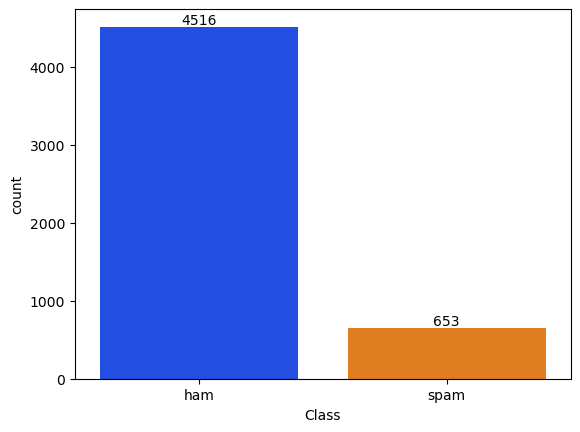

In [25]:
ax = sns.countplot(x='Class',data=data,palette='bright')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

<Axes: ylabel='count'>

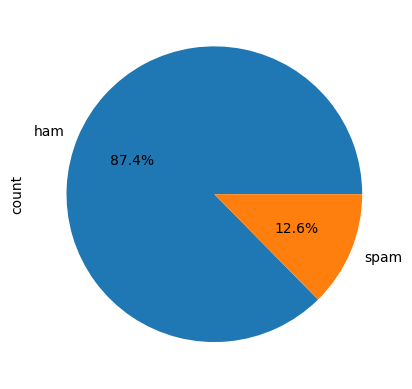

In [26]:
data.Class.value_counts().plot(kind='pie',autopct='%1.1f%%')

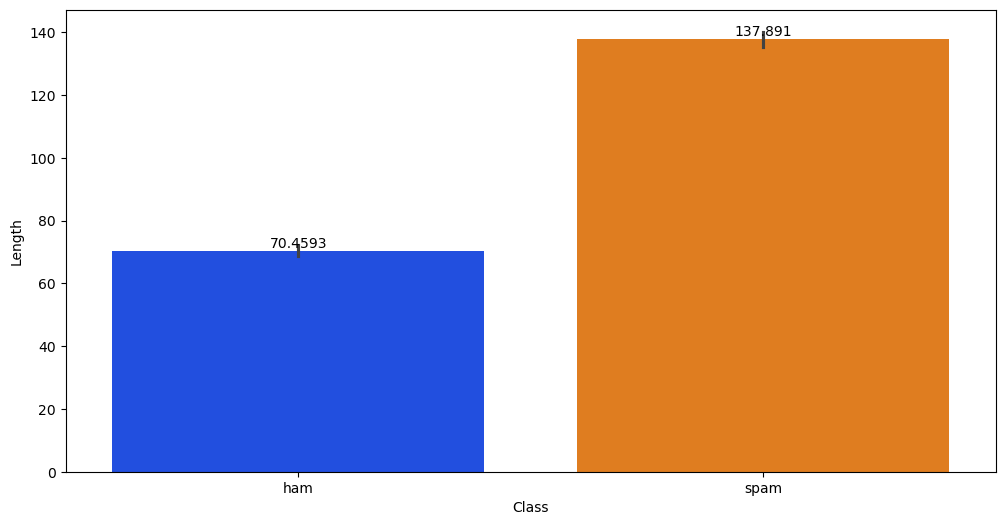

In [27]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Class',data=data,y='Length',palette='bright')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

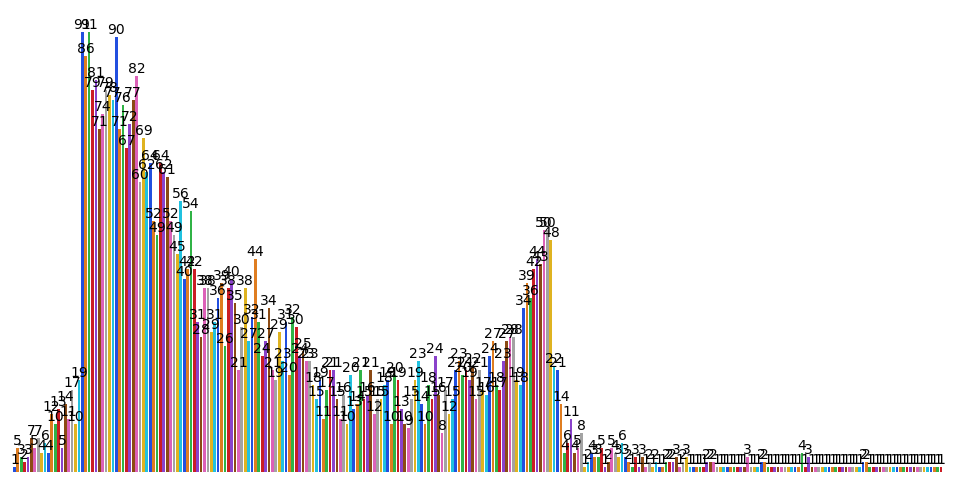

In [29]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Length',data=data,palette='bright')
for i in ax.containers:
    ax.bar_label(i)
plt.axis('off')
plt.show()

### Text Pre-Processing

In [30]:
# creating an object for the target values
Object = data['Class'].value_counts()
Object

Class
ham     4516
spam     653
Name: count, dtype: int64

In [32]:
data.Class.value_counts()

Class
ham     4516
spam     653
Name: count, dtype: int64

In [33]:
data.Class = data.Class.map({'ham':1,'spam':0})

In [34]:
data.head()

,Class,Message,Length
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


First removing punctuation. We can just take advantage of Python's built-in string library to get a quick list of all the possible punctuation:

In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
# Why is it important to remove punctuation?

"This message is spam" == "This message is spam."

False

In [37]:
"hello"=="hello!"

False

In [38]:
# Let's remove the punctuation

def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text.lower()

data['text_clean'] = data['Message'].apply(lambda x: remove_punct(x))

data.head()

,Class,Message,Length,text_clean
0,1,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...
1,1,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...
3,1,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,nah i dont think he goes to usf he lives aroun...


__Tokenization__ (process of converting the normal text strings in to a list of tokens(also known as lemmas)).

In [39]:
# original text and cleaned text
data.head(8)

,Class,Message,Length,text_clean
0,1,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...
1,1,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...
3,1,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,nah i dont think he goes to usf he lives aroun...
5,0,FreeMsg Hey there darling it's been 3 week's n...,148,freemsg hey there darling its been 3 weeks now...
6,1,Even my brother is not like to speak with me. ...,77,even my brother is not like to speak with me t...
7,1,As per your request 'Melle Melle (Oru Minnamin...,160,as per your request melle melle oru minnaminun...


Now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with and machine learning model which we will gonig to use can understand.

In [40]:
# Countvectorizer is a method to convert text to numerical data.(Bag of words)

# Initialize the object for countvectorizer
CV = CountVectorizer(stop_words="english")

[Stopwords are the words in any language which does not add much meaning to a sentence. They are the words which are very common in text documents such as a, an, the, you, your, etc. The Stop Words highly appear in text documents. However, they are not being helpful for text analysis in many of the cases, So it is better to remove from the text. We can focus on the important words if stop words have removed.]

In [41]:
CV.fit(data['text_clean'])

CountVectorizer(stop_words='english')

In [42]:
x=CV.transform(data['text_clean']).toarray()

In [43]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
data.head()

,Class,Message,Length,text_clean
0,1,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...
1,1,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...
3,1,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,nah i dont think he goes to usf he lives aroun...


In [45]:
x=CV.transform(data['Message']).toarray()

In [46]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
# Splitting x and y

xSet = data['text_clean'].values
ySet = data['Class'].values
ySet

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [48]:
# Datatype for y is object. lets convert it into int
ySet = ySet.astype('int')
ySet

array([1, 1, 0, ..., 1, 1, 1])

In [49]:
xSet

array(['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
       'ok lar joking wif u oni',
       'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s',
       ..., 'pity  was in mood for that soany other suggestions',
       'the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free',
       'rofl its true to its name'], dtype=object)

### Splitting Train and Test Data

In [50]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
y = data.Class
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Class, Length: 5169, dtype: int64

In [52]:
xSet_train,xSet_test,ySet_train,ySet_test = train_test_split(xSet,ySet,test_size=0.2, random_state=10)

In [53]:
xSet_train_CV = CV.fit_transform(xSet_train)
xSet_train_CV

<4135x7967 sparse matrix of type '<class 'numpy.int64'>'
	with 31332 stored elements in Compressed Sparse Row format>

In [54]:
xSet_train_CV.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Training a model

With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. For a variety of reasons, the Naive Bayes classifier algorithm is a good choice.

In [55]:
# Initialising the model
NB = MultinomialNB()

In [56]:
# feed data to the model
NB.fit(xSet_train_CV,ySet_train)

MultinomialNB()

In [57]:
xSet_test

array(['already am squatting is the new way of walking',
       'if you wereare free i can give otherwise nalla adi entey nattil kittum',
       'god blessget good sleep my deari will pray', ...,
       'hey you gave them your photo when you registered for driving ah tmr wanna meet at yck ',
       'im good i have been thinking about you', 'annoying isnt it'],
      dtype=object)

In [58]:
# Let's test CV on our test data
xSet_test_CV = CV.transform(xSet_test)

In [59]:
# prediction for xSet_test_CV

ySet_predict = NB.predict(xSet_test_CV)
ySet_predict

array([1, 0, 1, ..., 1, 1, 1])

In [60]:
# Checking accuracy

accuracyScore = accuracy_score(ySet_test,ySet_predict)*100

print("Prediction Accuracy :",accuracyScore)

Prediction Accuracy : 98.16247582205028


In [64]:
msg = input("Enter Message: ") # to get the input message
msgInput = CV.transform([msg]) #
predict = NB.predict(msgInput)
if(predict[0]==0):
    print("--------------------------------------------------MESSAGE-SENT-[Spam Message]---------------------------------------------------------------")
else:
    print("--------------------------------------------------MESSAGE-SENT-[CHECK-INBOX]----------------------------------------------------------------")

Enter Message:  Dear Vijay Sonvane,  The IBM Skills Network team has been developing new programs and updating existing ones to incorporate the latest technologies, all while continuing to support learners on their educational journeys.  We invite you to explore the following list of new and updated programs:  Generative AI for Human Resources (HR) Professionals Specialization  IBM Data Science Professional Certificate Update  IBM Data Engineering Professional Certificate Update  IBM Data Analyst Professional Certificate Update  IBM Data Warehouse Engineer Professional Certificate Update  IBM Skills Network aims to offer meaningful learning opportunities that assist you in reaching your career goals. We hope everyone discovers a program that captures their interest in the range of IBM Skills Network programs and courses available on Coursera.  Learn to use the capabilities and tools of generative AI to enhance your career with the Generative AI for Human Resources (HR) Professionals Sp

--------------------------------------------------MESSAGE-SENT-[Spam Message]---------------------------------------------------------------


In [65]:
# Splitting x and y

X = data['text_clean'].values
y = data['Class'].values
y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [66]:
type(X)

numpy.ndarray

In [67]:
## text preprocessing and feature vectorizer
# To extract features from a document of words, we import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


tf=TfidfVectorizer() ## object creation
X=tf.fit_transform(X) ## fitting and transforming the data into vectors
    

In [68]:
X.shape

(5169, 9489)

In [69]:
## print feature names selected from the raw documents
# tf.get_feature_names() 
tf.get_feature_names_out()

array(['008704050406', '0089my', '0121', ..., 'ûïharry', 'ûò', 'ûówell'],
      dtype=object)

In [70]:
## number of features created
len(tf.get_feature_names_out())

9489

In [71]:
X

<5169x9489 sparse matrix of type '<class 'numpy.float64'>'
	with 66755 stored elements in Compressed Sparse Row format>

In [72]:
## getting the feature vectors
X=X.toarray()

In [73]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
## Creating training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=6)

In [75]:
## Model creation
from sklearn.naive_bayes import BernoulliNB

## model object creation
nb=BernoulliNB(alpha=0.01)

## fitting the model
nb.fit(X_train,y_train)

## getting the prediction
y_hat=nb.predict(X_test)

In [76]:
y_hat

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [77]:
## Evaluating the model
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
print(accuracy_score(y_test,y_hat))

0.9891724671307038


In [79]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       155
           1       0.99      1.00      0.99      1138

    accuracy                           0.99      1293
   macro avg       0.98      0.97      0.97      1293
weighted avg       0.99      0.99      0.99      1293



In [80]:
## confusion matrix
pd.crosstab(y_test,y_hat)

col_0,0,1
row_0,,
0,145,10
1,4,1134


### **Task Overview**  
Spam emails, commonly known as junk mail, are sent in bulk and often include cryptic messages, scams, or phishing content. The objective of this project is to develop a machine learning model to classify emails as either **spam** or **ham (non-spam)**, ensuring important business communications are not overlooked.  

### **Approach and Model Performance**  
To achieve this, I used the **Naive Bayes** algorithm, which performed exceptionally well for this classification task.  
- **Accuracy**: The model achieved an accuracy score of **98%**, surpassing other algorithms tested.  
- **Outcome**: This high accuracy ensures reliable identification of spam emails, enhancing email management and prioritization for business purposes.  

---

### **Dataset Insights**  
- **Total Records**: 5,572  
- **Missing Values**: None  
- **Duplicate Records**: 403, which were removed to improve model performance.  
- **Message Length**:  
  - Maximum: 910 characters  
  - Minimum: 2 characters  
- **Class Distribution**:  
  - **Ham Messages**: 4,516 (87.45%)  
  - **Spam Messages**: 653 (12.6%)  

---

### **Preprocessing Steps**  
- Removed duplicate records to enhance the dataset’s quality and improve model accuracy.  
- Analyzed the distribution of message lengths and class proportions to better understand the dataset.  

---

### **Conclusion**  
This project demonstrates the effectiveness of the Naive Bayes model in spam email detection. By achieving a high accuracy of 98%, this solution ensures improved email filtering, allowing businesses to focus on critical communications and reducing the risks associated with spam emails.  